# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
country = []
city_list = []
date = []
max_temp = []
cloudy = []
humidity = []
lat = []
long = []
wind_speed = []

# API DATA

In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")
 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
 
# Create a loop for all cities
i = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q" + city
    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='
                                   f'{city}&units=imperial').json()
    
    try:
        country.append(response["sys"]["country"])
        city_list.append(response["name"])
        date.append(response["dt"])
        cloudy.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record : {i}|{city}") 
        i+=1
  
    except(KeyError):
        print("City not found. Skipping...")
 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record : 1|bethel
Processing Record : 2|inhambane
Processing Record : 3|jamestown
Processing Record : 4|port alfred
Processing Record : 5|salina cruz
City not found. Skipping...
Processing Record : 6|ponta delgada
Processing Record : 7|babstovo
City not found. Skipping...
Processing Record : 8|albany
Processing Record : 9|itoman
Processing Record : 10|rikitea
Processing Record : 11|manacapuru
Processing Record : 12|chuy
Processing Record : 13|grimshaw
Processing Record : 14|mataura
City not found. Skipping...
Processing Record : 15|ushuaia
Processing Record : 16|saposoa
Processing Record : 17|severo-kurilsk
Processing Record : 18|ribeira grande
Processing Record : 19|ponta do sol
City not found. Skipping...
Processing Record : 20|laje
Processing Record : 21|lebu
Processing Record : 22|coihaique
Processing Record : 23|busselton
Processing Record : 24|punta arenas
Processing Record : 25|lagoa
Processing Record : 26|barrow


Processing Record : 234|mersin
Processing Record : 235|tura
Processing Record : 236|christchurch
Processing Record : 237|soyo
Processing Record : 238|sao gabriel da cachoeira
Processing Record : 239|ancud
City not found. Skipping...
Processing Record : 240|tarakan
Processing Record : 241|lavrentiya
Processing Record : 242|dordrecht
Processing Record : 243|chicama
Processing Record : 244|porto novo
Processing Record : 245|shimizu
Processing Record : 246|centenario do sul
Processing Record : 247|bhikangaon
City not found. Skipping...
Processing Record : 248|lovington
City not found. Skipping...
Processing Record : 249|antalaha
City not found. Skipping...
City not found. Skipping...
Processing Record : 250|la rioja
Processing Record : 251|tiznit
Processing Record : 252|miri
Processing Record : 253|aklavik
Processing Record : 254|peace river
Processing Record : 255|monte alegre
Processing Record : 256|orlik
City not found. Skipping...
Processing Record : 257|te anau
Processing Record : 258

Processing Record : 457|springbok
Processing Record : 458|tiksi
Processing Record : 459|chekmagush
Processing Record : 460|shebunino
Processing Record : 461|kasongo
Processing Record : 462|houston
Processing Record : 463|requena
Processing Record : 464|port blair
Processing Record : 465|emborion
Processing Record : 466|szentlorinckata
Processing Record : 467|bilma
Processing Record : 468|zolochiv
Processing Record : 469|morros
Processing Record : 470|zhangye
Processing Record : 471|qiongshan
Processing Record : 472|seddon
Processing Record : 473|la seyne-sur-mer
Processing Record : 474|maputo
Processing Record : 475|vanderhoof
Processing Record : 476|roald
Processing Record : 477|belaya gora
Processing Record : 478|winton
Processing Record : 479|gelemso
Processing Record : 480|berlevag
Processing Record : 481|warrnambool
Processing Record : 482|celestun
Processing Record : 483|los llanos de aridane
Processing Record : 484|shimoda
Processing Record : 485|olindina
Processing Record : 486

In [5]:
weather_df = pd.DataFrame ({
    "Country" : country,
    "City" : city_list,
    "Date" : date,
    "Max Temp" : max_temp,
    "Cloudiness" : cloudy,
    "Humid" : humidity,
    "Latitude" : lat,
    "Longitude" : long,
    "Wind Speed" : wind_speed 
})
weather_df

Country          City        Date  Max Temp  Cloudiness  Humid  Latitude  \
0        US        Bethel  1651936501     50.85         100     78   41.3712   
1        MZ     Inhambane  1651936455     73.33           0     76  -23.8650   
2        US     Jamestown  1651936391     55.02           0     54   42.0970   
3        ZA   Port Alfred  1651936515     63.18          79     95  -33.5906   
4        MX   Salina Cruz  1651936761     86.43          39     57   16.1667   
..      ...           ...         ...       ...         ...    ...       ...   
580      AR      Necochea  1651937059     67.86         100     53  -38.5473   
581      IN   Yerraguntla  1651937060     97.11          97     28   14.6372   
582      RU    Novoagansk  1651937060     18.14          66     86   61.9449   
583      US        Dawson  1651937061     74.62           0     51   31.7735   
584      RU  Petrozavodsk  1651937062     63.86           0     34   61.7849   

     Longitude  Wind Speed  
0     -73.4140        8.99  
1      35.3833        5.86  
2     -79.2353       11.99  
3      26.8910        5.01  
4     -95.2000        5.44  
..         ...         ...  
580   -58.7368       12.84  
581    78.5395       14.52  
582    76.6625        9.55  
583   -84.4466       14.99  
584    34.3469       17.90  

[585 rows x 9 columns]

In [6]:
# Export to csv
weather_df.to_csv("output_data/cities.csv")

# City Latitude vs. Max Temp

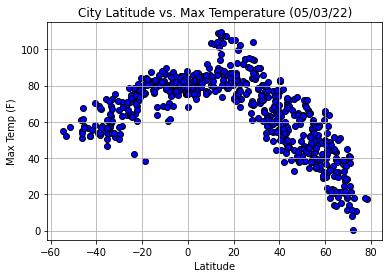

In [8]:
# Create scatter plot Latitude vs. Temperature Plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "black")
 
plt.grid()
 
plt.title("City Latitude vs. Max Temperature (05/03/22)")
 
plt.xlabel("Latitude")
 
plt.ylabel("Max Temp (F)")
 
plt.savefig("output_data/LatvsTempplot")
 
plt.show()

In [9]:
weather_df.count()

Country       585
City          585
Date          585
Max Temp      585
Cloudiness    585
Humid         585
Latitude      585
Longitude     585
Wind Speed    585
dtype: int64

# Latitude vs. Humidity

<function matplotlib.pyplot.show(close=None, block=None)>

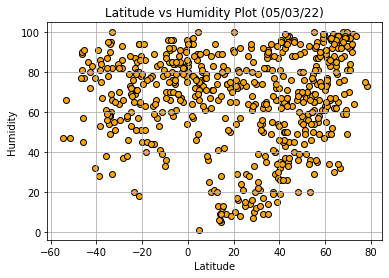

In [10]:
# Create scatter plot Latitude vs. Humidity Plot
plt.scatter(weather_df["Latitude"], weather_df["Humid"], facecolor = "orange", edgecolor = "black")
 
plt.grid()
 
plt.title("Latitude vs Humidity Plot (05/03/22)")
 
plt.xlabel("Latitude")
 
plt.ylabel("Humidity")
 
plt.savefig("output_data/LatvsHumidity")
 
plt.show

# Latitude vs. Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

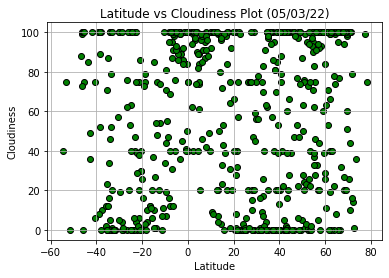

In [11]:
# Create scatter plot Latitude vs. Cloudiness Plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolor = "green", edgecolor = "black")
 
plt.grid()
 
plt.title("Latitude vs Cloudiness Plot (05/03/22)")
 
plt.xlabel("Latitude")
 
plt.ylabel("Cloudiness")
 
plt.savefig("output_data/LatvsCloudiness")
 
plt.show

# Latitude vs. Wind Speed

<function matplotlib.pyplot.show(close=None, block=None)>

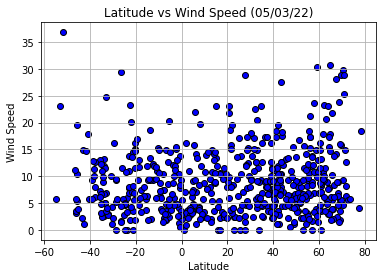

In [12]:
# Create scatter plot Latitude vs. Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")
 
plt.grid()
 
plt.title("Latitude vs Wind Speed (05/03/22)")
 
plt.xlabel("Latitude")
 
plt.ylabel("Wind Speed")
 
plt.savefig("output_data/LatvsWindSpeed")
 
plt.show

# Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[weather_df["Latitude"] >=0]
south_hemi = weather_df.loc[weather_df["Latitude"] < 0]

In [17]:
 def linear_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values,"r-")
    
    plt.annotate(line_eq,(x_values.median(),y_values.median()), fontsize=14, color="red")
    
    print(f"The r-value is: {rvalue}")
    
    return line_eq

The r-value is: -0.8472864536993036
y = -0.95x + 98.62


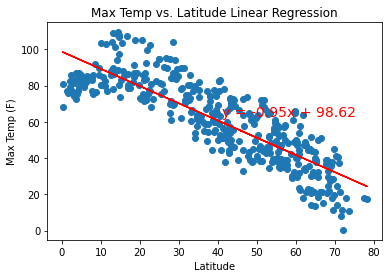

In [18]:
x_values = north_hemi["Latitude"]
 
y_values = north_hemi["Max Temp"]
 
plt.title("Max Temp vs. Latitude Linear Regression")
 
plt.ylabel("Max Temp (F)")
 
plt.xlabel("Latitude")
 
plt.show
 
print(linear_reg(x_values, y_values))

The r-value is: 0.7493993736010484
y = 0.61x + 83.95


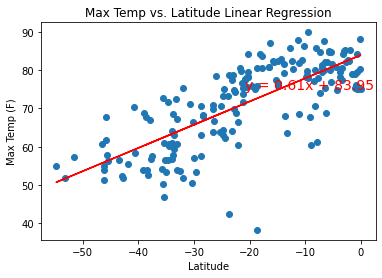

In [19]:
x_values = south_hemi["Latitude"]
 
y_values = south_hemi["Max Temp"]
 
plt.title("Max Temp vs. Latitude Linear Regression")
 
plt.ylabel("Max Temp (F)")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))

The r-value is: 0.23898919259115456
y = 0.3x + 52.54


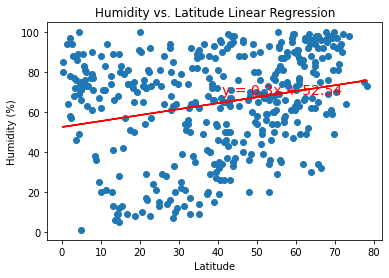

In [20]:
x_values = north_hemi["Latitude"]
 
y_values = north_hemi["Humid"]
 
plt.title("Humidity vs. Latitude Linear Regression")
 
plt.ylabel("Humidity (%)")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))

The r-value is: 0.17325850708704257
y = 0.22x + 75.44


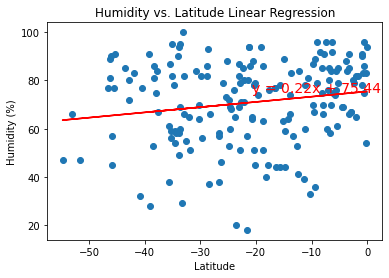

In [21]:
x_values = south_hemi["Latitude"]
 
y_values = south_hemi["Humid"]
 
plt.title("Humidity vs. Latitude Linear Regression")
 
plt.ylabel("Humidity (%)")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))

The r-value is: 0.053611526777364
y = 0.1x + 55.23


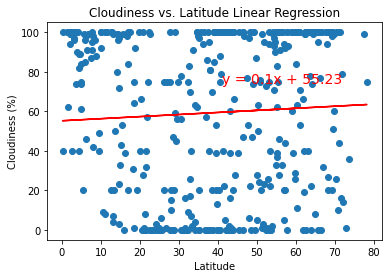

In [22]:
x_values = north_hemi["Latitude"]
 
y_values = north_hemi["Cloudiness"]
 
plt.title("Cloudiness vs. Latitude Linear Regression")
 
plt.ylabel("Cloudiness (%)")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))

The r-value is: 0.20841372186368876
y = 0.59x + 62.36


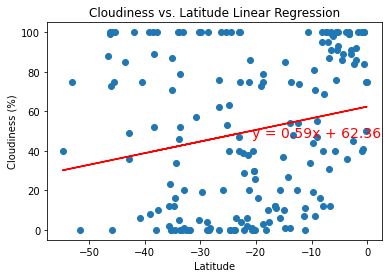

In [23]:
x_values = south_hemi["Latitude"]
 
y_values = south_hemi["Cloudiness"]
 
plt.title("Cloudiness vs. Latitude Linear Regression")
 
plt.ylabel("Cloudiness (%)")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))

The r-value is: 0.15466503031151316
y = 0.05x + 7.04


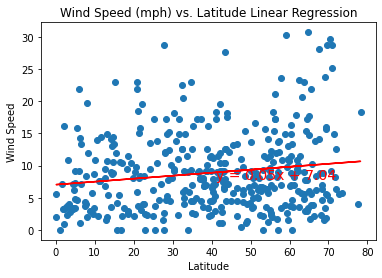

In [24]:
x_values = north_hemi["Latitude"]
 
y_values = north_hemi["Wind Speed"]
 
plt.title("Wind Speed (mph) vs. Latitude Linear Regression")
 
plt.ylabel("Wind Speed")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))

The r-value is: -0.12758886776158737
y = -0.05x + 7.16


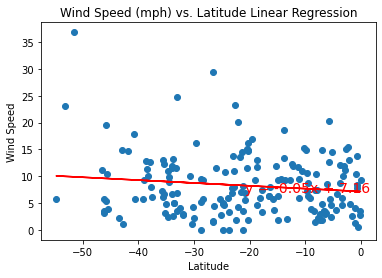

In [26]:
x_values = south_hemi["Latitude"]
 
y_values = south_hemi["Wind Speed"]
 
plt.title("Wind Speed (mph) vs. Latitude Linear Regression")
 
plt.ylabel("Wind Speed")
 
plt.xlabel("Latitude")
 
print(linear_reg(x_values, y_values))